#1-Import libraries and Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from IPython.core.pylabtools import figsize

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import sys

We load the dataset from our Github

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/Kijako/Kijako/main/dataset_diabetes/diabetic_data.csv")
dico_labels = "https://raw.githubusercontent.com/Kijako/Python_S7_Diabete/main/dataset_diabetes/mapping_diabete.py"

# 2-Getting to know the dataset

Let's have a preview of our data

In [3]:
pd.set_option("display.max_columns", None)
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
print("Nombre de colonnes = ", len(df.columns))
print("Nombre d'entrées = ", len(df))

Nombre de colonnes =  50
Nombre d'entrées =  101766


Our dataset contains a large amount of information with over 100,000 entries and 50 variables. 

#3-Data Cleaning


First we transforme the unknown data into a NaN cell.

In [6]:
df = df.replace('?', np.NaN)
df = df.replace('Unknown/Invalid', np.NaN)


Here we count how many cell are "NaN" to evaluate which variable we can drop. We can see that 96% data of the weight, 49% of the medical_speciality and 40% of the payer_code informations are missing

In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
encounter_id,encounter_id,0.000000
patient_nbr,patient_nbr,0.000000
race,race,2.233555
gender,gender,0.002948
age,age,0.000000
weight,weight,96.858479
admission_type_id,admission_type_id,0.000000
discharge_disposition_id,discharge_disposition_id,0.000000
admission_source_id,admission_source_id,0.000000
time_in_hospital,time_in_hospital,0.000000


We change all the qualitative variables into qualitative ones.
We create dictionaries

In [8]:
admission_type_id = {
1:"Emergency",
2:"Urgent",
3:"Elective",
4:"Newborn",
5:"Not Available",
6:"NULL",
7:"Trauma Center",
8:"Not Mapped"
}


discharge_disposition_id = {
1:"Discharged to home",
2:"Discharged/transferred to another short term hospital",
3:"Discharged/transferred to SNF",
4:"Discharged/transferred to ICF",
5:"Discharged/transferred to another type of inpatient care institution",
6:"Discharged/transferred to home with home health service",
7:"Left AMA",
8:"Discharged/transferred to home under care of Home IV provider",
9:"Admitted as an inpatient to this hospital",
10:"Neonate discharged to another hospital for neonatal aftercare",
11:"Expired",
12:"Still patient or expected to return for outpatient services",
13:"Hospice / home",
14:"Hospice / medical facility",
15:"Discharged/transferred with in this institution to Medicare approved swing bed",
16:"Discharged/transferred/referred another institution for outpatient services",
17:"Discharged/transferred/referred to this institution for outpatient services",
18:"NULL",
19:"Expired at home. Medicaid only: hospice.",
20:"Expired in a medical facility. Medicaid only: hospice.",
21:"Expired: place unknown. Medicaid only: hospice.",
22:"Discharged/transferred to another rehab fac including rehab units of a hospital.",
23:"Discharged/transferred to a long term care hospital.",
24:"Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.",
25:"Not Mapped",
26:"Unknown/Invalid",
30:"Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere",
27:"Discharged/transferred to a federal health care facility.",
28:"Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",
29:"Discharged/transferred to a Critical Access Hospital (CAH)."
}


admission_source_id = {
1: "Physician Referral",
2:"Clinic Referral",
3:"HMO Referral",
4:"Transfer from a hospital",
5: "Transfer from a Skilled Nursing Facility (SNF)",
6:" Transfer from another health care facility",
7: "Emergency Room",
8: "Court/Law Enforcement",
9: "Not Available",
10: "Transfer from critial access hospital",
11:"Normal Delivery",
12: "Premature Delivery",
13: "Sick Baby",
14: "Extramural Birth",
15:"Not Available",
17:"NULL",
18: "Transfer From Another Home Health Agency",
19:"Readmission to Same Home Health Agency",
20: "Not Mapped",
21:"Unknown/Invalid",
22: "Transfer from hospital inpt/same fac reslt in a sep claim",
23: "Born inside this hospital",
24: "Born outside this hospital",
25: "Transfer from Ambulatory Surgery Center",
26:"Transfer from Hospice"
}

diag_1_2_3 = {

}

age = {
1:"[0-10)",
2:"[10-20)",
3:"[20-30)",
4:"[30-40)",
5:"[40-50)",
6:"[50-60)",
7:"[60-70)",
8:"[70-80)",
9:"[80-90)",
10:"[90-100)"

}

gender = {
1:"Male",
2:"Female",
3:"Unknown/Invalid"
}

race = {
1:"AfricanAmerican",
2:"Asian",
3:"Caucasian",
4:"Hispanic",
5:"Other"
}

four_factor = {
1: "Down",
2: "No",
3: "Steady",
4: "Up"
}

two_factor = {
1: "No",
2: "Steady",
}

no_yes = {
1: "Yes",
2: "No"
}

three_factor = {
1: "No",
2: "Steady",
}

ch_no = {
1:"No",
2:"Ch"
}

readmission = {
1:"<30",
2:">30",
3:"NO"
}

max_glu_serum = {
1: ">200",
2: ">300",
3: "None",
4: "Norm"
}

A1Cresult = {
1: ">7",
2: ">8",
3: "None",
4: "Norm"
}

diags_dict = {
1: "Circulatory",
2: "Respiratory",
3: "Digestive",
4: "Diabetes",
5: "Injury",
6: "Musculoskeletal",
7: "Genitourinary",
8: "Neoplasms",
9: "Other"
}

Then we create new variables that take the information from our dictionaries

In [9]:
inv_race = {v: k for k, v in race.items()}
inv_age = {v: k for k, v in age.items()}
inv_gender = {v: k for k, v in gender.items()}
inv_four_factor = {v: k for k, v in four_factor.items()}
inv_three_factor = {v: k for k, v in three_factor.items()}
inv_two_factor = {v: k for k, v in two_factor.items()}
inv_no_yes = {v: k for k, v in no_yes.items()}
inv_ch_no = {v: k for k, v in ch_no.items()}
inv_readmission = {v: k for k, v in readmission.items()}
inv_max_glu_serum = {v: k for k, v in max_glu_serum.items()}
inv_A1Cresult = {v: k for k, v in A1Cresult.items()}
inv_diags_dict = {v: k for k, v in diags_dict.items()}

Finally we replace the old data by the new ones that are quantitative

In [10]:
df["race"]=df.race.map(inv_race)
df["gender"]=df.gender.map(inv_gender)
df["age"]=df.age.map(inv_age)
df["max_glu_serum"]=df.max_glu_serum.map(inv_max_glu_serum)
df["A1Cresult"]=df.A1Cresult.map(inv_A1Cresult)
df["metformin"]=df.metformin.map(inv_four_factor)
df["repaglinide"]=df.repaglinide.map(inv_four_factor)
df["nateglinide"]=df.nateglinide.map(inv_four_factor)
df["chlorpropamide"]=df.chlorpropamide.map(inv_four_factor)
df["glimepiride"]=df.glimepiride.map(inv_four_factor)
df["acetohexamide"]=df.acetohexamide.map(inv_two_factor)
df["glipizide"]=df.glipizide.map(inv_four_factor)
df["glyburide"]=df.glyburide.map(inv_four_factor)
df["tolbutamide"]=df.tolbutamide.map(inv_two_factor)
df["pioglitazone"]=df.pioglitazone.map(inv_four_factor)
df["rosiglitazone"]=df.rosiglitazone.map(inv_four_factor)
df["acarbose"]=df.acarbose.map(inv_four_factor)
df["miglitol"]=df.miglitol.map(inv_four_factor)
df["troglitazone"]=df.troglitazone.map(inv_two_factor)
df["tolazamide"]=df.tolazamide.map(inv_three_factor)
df["insulin"]=df.insulin.map(inv_four_factor)
df["glyburide-metformin"]=df["glyburide-metformin"].map(inv_four_factor)
df["glipizide-metformin"]=df["glipizide-metformin"].map(inv_two_factor)
df["glimepiride-pioglitazone"]=df["glimepiride-pioglitazone"].map(inv_two_factor)
df["metformin-rosiglitazone"]=df["metformin-rosiglitazone"].map(inv_two_factor)
df["metformin-pioglitazone"]=df["metformin-pioglitazone"].map(inv_two_factor)
df["change"]=df.change.map(inv_ch_no)
df["diabetesMed"]=df.diabetesMed.map(inv_no_yes)
df["readmitted"]=df.readmitted.map(inv_readmission)

In [11]:
df2 = pd.read_csv(r"https://raw.githubusercontent.com/Kijako/Kijako/main/dataset_diabetes/diabetic_data.csv")
diags = ['diag_1', 'diag_2', 'diag_3']


df2 = df2.replace('?', np.NaN)
df2 = df2[['diag_1','diag_2', 'diag_3']]
df2[['diag_1', 'diag_2', 'diag_3']] = df2[['diag_1', 'diag_2', 'diag_3']].replace('[a-zA-Z]+\d*', np.NaN, regex=True)
df2[['diag_1', 'diag_2', 'diag_3']] = df2[['diag_1', 'diag_2', 'diag_3']].astype(float, errors = 'raise')
pd.set_option('display.max_rows', 50)
df2.head()

,diag_1,diag_2,diag_3
0,250.83,NaN,NaN
1,276.00,250.01,255.0
2,648.00,250.00,NaN
3,8.00,250.43,403.0
4,197.00,157.00,250.0


In [12]:
def sorting(row):
  if pd.isna(row[diag]) == True:
    return np.nan
  elif 250 <= row[diag] < 251:
    return 'Diabetes'

  elif (389 < row[diag] < 460) | (row[diag]==785):
    return 'Circulatory'

  elif (459 < row[diag] < 520) | (row[diag]==786):
    return 'Respiratory'

  elif (519 < row[diag] < 580) | (row[diag]==787):
    return 'Digestive'

  elif 799 < row[diag] < 1000:
    return 'Injury'

  elif 709 < row[diag] < 740:
    return 'Musculoskeletal'

  elif (579 < row[diag] < 630) | (row[diag]==788):
    return 'Genitourinary'

  elif ((139 < row[diag] < 240) |
   (row[diag] in [780, 781, 784]) |
   (row[diag] in range(790,799)) |
   ((row[diag] in range(240,279)) & (row[diag]!=250))|
   (row[diag] in range(680,709)) |
   (row[diag] == 782)|
   (row[diag] in range(1,139))):
    return 'Neoplasms'

  else :
    return 'Other'


for diag in diags : 
  df2[diag+'_lab'] = df2.apply(sorting, axis=1)

In [13]:
df[['diag_1', 'diag_2', 'diag_3']] = df2[['diag_1_lab', 'diag_2_lab', 'diag_3_lab']]

df["diag_1"]=df.diag_1.map(inv_diags_dict)
df["diag_2"]=df.diag_2.map(inv_diags_dict)
df["diag_3"]=df.diag_3.map(inv_diags_dict)

In [14]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,3.0,2.0,1,NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,4.0,NaN,NaN,1,3,3,2,2,2,2,2,1,2,2,1,2,2,2,2,1,1.0,No,No,2,2,1,1,1,1,1,2,3
1,149190,55629189,3.0,2.0,2,NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,8.0,4.0,8.0,9,3,3,2,2,2,2,2,1,2,2,1,2,2,2,2,1,1.0,No,No,4,2,1,1,1,1,2,1,2
2,64410,86047875,1.0,2.0,3,NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,9.0,4.0,NaN,6,3,3,2,2,2,2,2,1,3,2,1,2,2,2,2,1,1.0,No,No,2,2,1,1,1,1,1,1,3
3,500364,82442376,3.0,1.0,4,NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8.0,4.0,1.0,7,3,3,2,2,2,2,2,1,2,2,1,2,2,2,2,1,1.0,No,No,4,2,1,1,1,1,2,1,3
4,16680,42519267,3.0,1.0,5,NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,8.0,8.0,4.0,5,3,3,2,2,2,2,2,1,3,2,1,2,2,2,2,1,1.0,No,No,3,2,1,1,1,1,2,1,3


We are going to drop every column that as too few informations (Weight, payer_code,medical_specialty) 
We are also going to drop every column that has a too small variance because it's not very representative and useful for us (we delete columns with var < 10e-1)


In [15]:
print(df.var())

encounter_id                1.053503e+16
patient_nbr                 1.497408e+15
race                        7.429229e-01
gender                      2.485885e-01
age                         2.541103e+00
admission_type_id           2.089189e+00
discharge_disposition_id    2.788015e+01
admission_source_id         1.651675e+01
time_in_hospital            8.910868e+00
num_lab_procedures          3.870805e+02
num_procedures              2.909777e+00
num_medications             6.605733e+01
number_outpatient           1.605961e+00
number_emergency            8.657786e-01
number_inpatient            1.594824e+00
diag_1                      7.850383e+00
diag_2                      9.220834e+00
diag_3                      9.019738e+00
number_diagnoses            3.738810e+00
max_glu_serum               9.605137e-02
A1Cresult                   2.682376e-01
metformin                   1.896100e-01
repaglinide                 1.813115e-02
nateglinide                 7.567592e-03
chlorpropamide  

In [16]:
df = df.drop(['weight',
       'payer_code', 'medical_specialty',
       'max_glu_serum', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide','tolbutamide', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'], axis=1)

In [17]:
df.shape

(101766, 29)

We have now 29 variables

#4-Data Vizualization 

First, let's have a look to our main variables, what are their statistics in our dataset. 

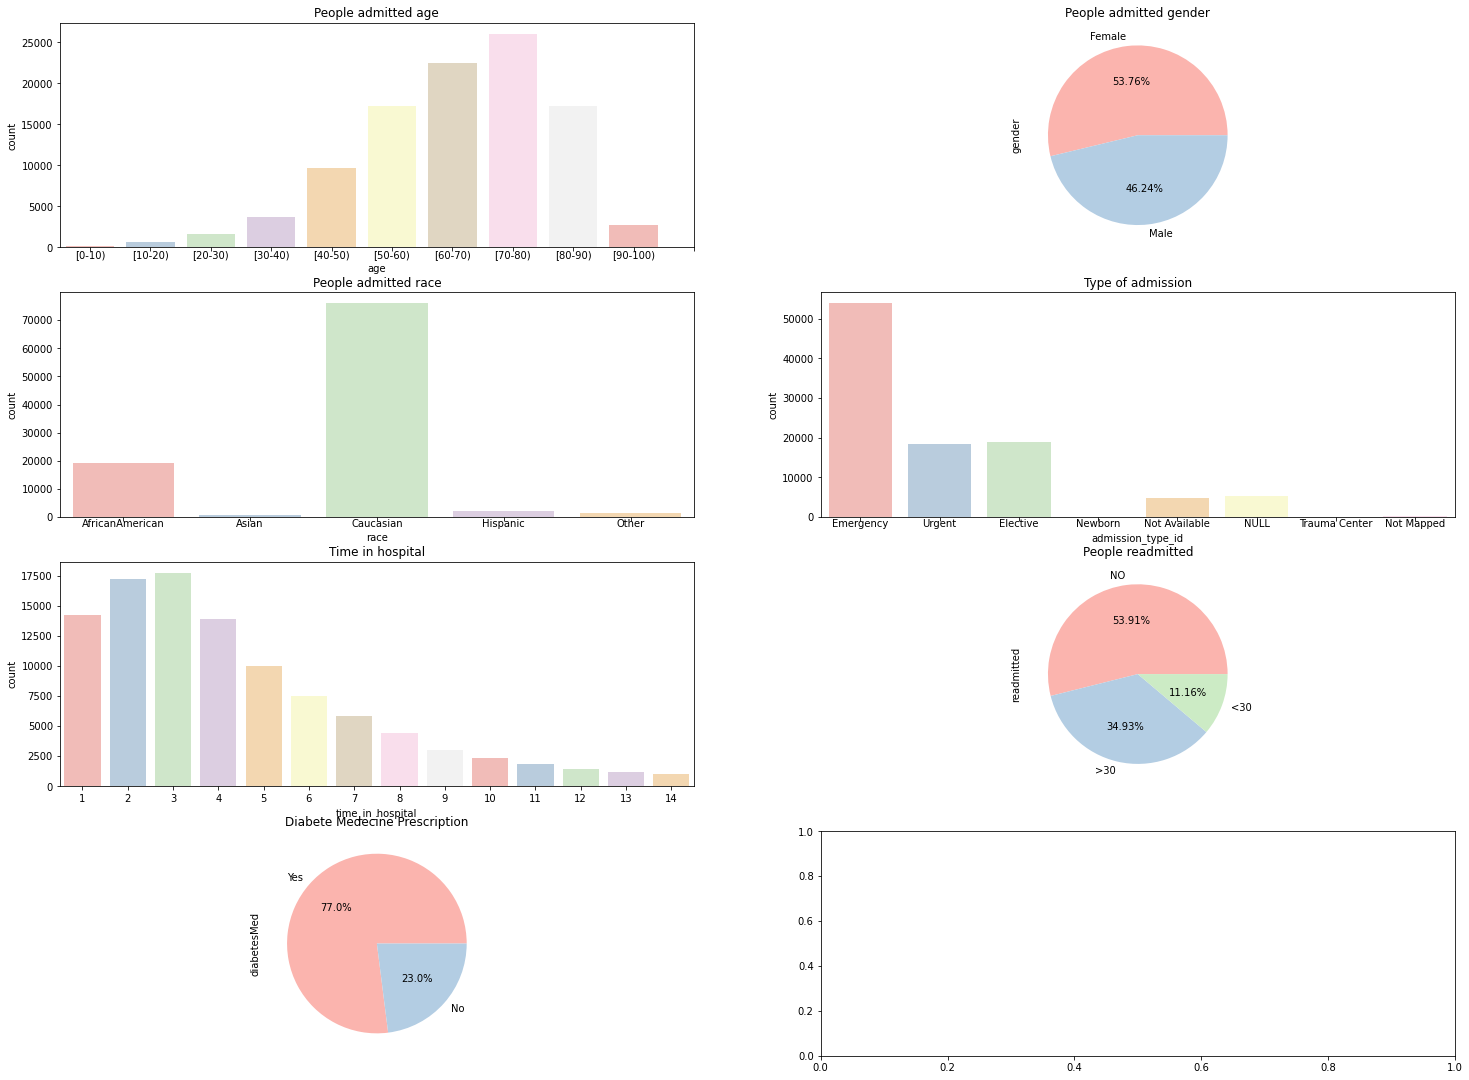

In [18]:
color = sns.color_palette('Pastel1')
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25,19)) 

sns.countplot(data=df, x='age', palette = 'Pastel1',ax= axes[0,0])
plt.sca(axes[0,0])
plt.xticks(np.arange(11),labels = age.values(),fontsize = 10, verticalalignment = 'center')
plt.title("People admitted age")

plt.sca(axes[0,1])
df.gender.value_counts().plot(kind='pie', autopct = lambda x: str(round(x, 2)) + '%',colors = color, labels = ['Female','Male'],ax= axes[0,1])
plt.title("People admitted gender")

plt.sca(axes[1,0])
sns.countplot(data=df, x='race', palette = 'Pastel1',ax=axes[1,0])
plt.title("People admitted race") 
plt.xticks(np.arange(5),labels = race.values(),fontsize = 10, verticalalignment = 'center')

plt.sca(axes[1,1])
sns.countplot(data=df, x='admission_type_id', palette = 'Pastel1', ax=axes[1,1])
plt.title("Type of admission")
plt.xticks(np.arange(8),labels = admission_type_id.values(),fontsize = 10, verticalalignment = 'center')

plt.sca(axes[2,0])
sns.countplot(data=df, x='time_in_hospital', palette = 'Pastel1')
plt.title("Time in hospital")

plt.sca(axes[2,1])
plt.title("People readmitted")
df.readmitted.value_counts().plot(kind='pie', autopct = lambda x: str(round(x, 2)) + '%',colors = color, labels = ['NO','>30','<30'], ax= axes[2,1])

plt.sca(axes[3,0])
plt.title("Diabete Medecine Prescription")
df.diabetesMed.value_counts().plot(kind='pie', autopct = lambda x: str(round(x, 2)) + '%',colors = color, labels = no_yes.values(),ax= axes[3,0])


We have more than 100 000 entries but those visits to hospital could be realize several time by the same patients. We have 71 518 different patient in our dataset. 

In [19]:
df1 = df['patient_nbr'].value_counts()
print("There is",len(df1), 'different patient')

There is 71518 different patient


The idea of our Machine Learning just below is to guess if a patient will be back at the hospital and how long it will take. Those graphs show the percentage of readmission according to other variables. 

([<matplotlib.axis.XTick at 0x7f86ee00f690>,
 [Text(0, 0, 'Yes'), Text(0, 0, 'No')])

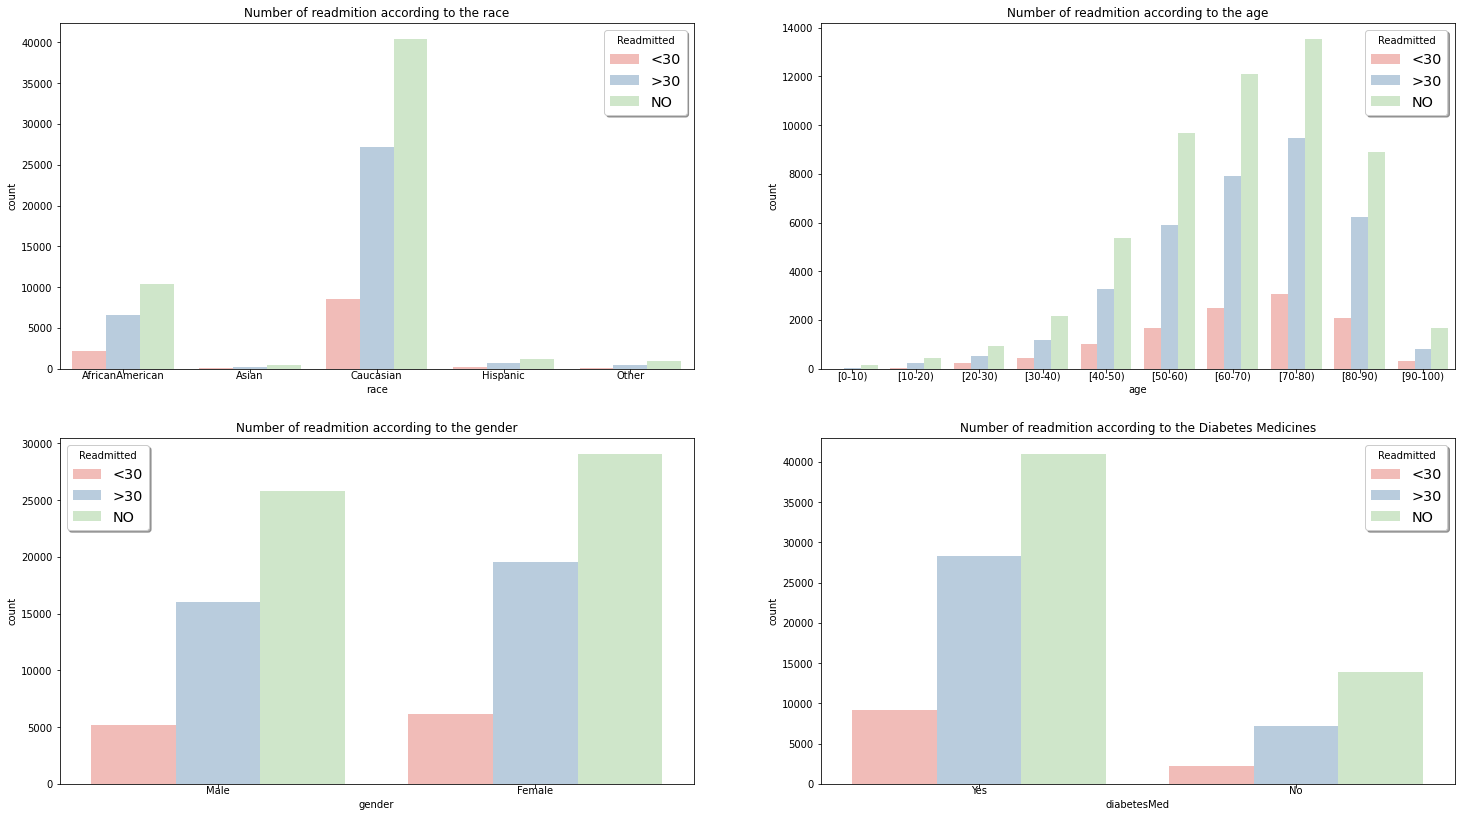

In [20]:
color = sns.color_palette('Pastel1')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,14)) 

plt.sca(axes[0,0])
sns.countplot(data=df, x='race', hue='readmitted', palette = 'Pastel1',ax=axes[0,0])
plt.legend(shadow=True, title='Readmitted',fontsize = 'x-large', labels = readmission.values())
plt.title("Number of readmition according to the race")
plt.xticks(np.arange(5),labels = race.values(),fontsize = 10, verticalalignment = 'center')

plt.sca(axes[0,1])
sns.countplot(data=df, x='age', hue='readmitted', palette = 'Pastel1',ax= axes[0,1])
plt.legend(shadow=True, title='Readmitted',fontsize = 'x-large', labels = readmission.values())
plt.title("Number of readmition according to the age")
plt.xticks(np.arange(10),labels = age.values(),fontsize = 10, verticalalignment = 'center')

plt.sca(axes[1,0])
sns.countplot(data=df, x='gender', hue='readmitted', palette = 'Pastel1',ax=axes[1,0])
plt.legend(shadow=True, title='Readmitted',fontsize = 'x-large', labels = readmission.values())
plt.title("Number of readmition according to the gender")
plt.xticks(np.arange(2),labels = gender.values(),fontsize = 10, verticalalignment = 'center')

plt.sca(axes[1,1])
sns.countplot(data=df, x='diabetesMed', hue='readmitted', palette = 'Pastel1',ax=axes[1,1])
plt.legend(shadow=True, title='Readmitted',fontsize = 'x-large', labels = readmission.values())
plt.title("Number of readmition according to the Diabetes Medicines")
axes = pyplot.gca() 
plt.xticks(np.arange(2),labels = no_yes.values(),fontsize = 10, verticalalignment = 'center')



# 5-Machine Learning

First we make a correlation matrix

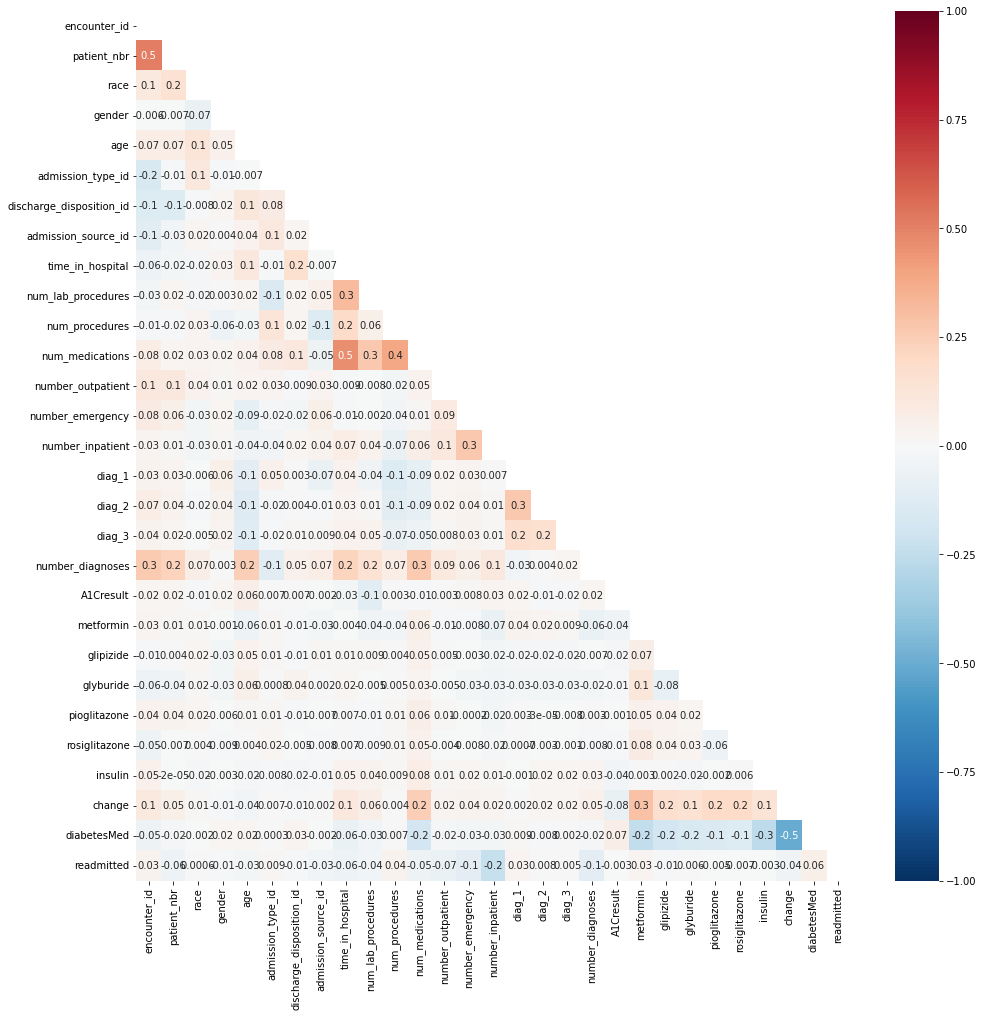

In [21]:
matrix= np.triu(df.corr())
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(df.corr(), annot=True,ax=ax,fmt='.1g',vmin=-1,vmax=1,center=0,mask=matrix,cmap='RdBu_r')
plt.show()

We can see that medication number and time stay in hospital are highly correlated as well as change (blood exam change or not durind the stay in hospital) and DiabetesMed (if the patient has diabete treatment) and Medication number with the procedure number. We can also see that readmitted is not highly correlated with another variable.

We check that all variables are float or int to integrate them to our models correctly.




In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101766 non-null  int64  
 1   patient_nbr               101766 non-null  int64  
 2   race                      99493 non-null   float64
 3   gender                    101763 non-null  float64
 4   age                       101766 non-null  int64  
 5   admission_type_id         101766 non-null  int64  
 6   discharge_disposition_id  101766 non-null  int64  
 7   admission_source_id       101766 non-null  int64  
 8   time_in_hospital          101766 non-null  int64  
 9   num_lab_procedures        101766 non-null  int64  
 10  num_procedures            101766 non-null  int64  
 11  num_medications           101766 non-null  int64  
 12  number_outpatient         101766 non-null  int64  
 13  number_emergency          101766 non-null  i

We drop all the lines with 'NaN' cell.

We split our dataset in two. The first part is composed only of the variable readmitted, the second of all the other variables that we have kept except 'patient_nbr' and 'encounter_id' which will not bring us any information. We then separate our dataset into train and test.

Finally we check that all their is no 'NaN' or infinite number in our dataset. 



In [23]:
df=df.dropna()
A = df['readmitted']
B= df.drop(['patient_nbr','encounter_id','readmitted'],axis=1)
Btrain,Btry,Atrain,Atry = train_test_split(B,A,test_size=0.3,random_state=101)
Bval,Btest,Aval,Atest = train_test_split(Btry,Atry,test_size=0.5,random_state=101)

print(len(Atest))
print(len(Btest))
print(len(Aval))
print(len(Bval))
print(len(Atrain))
print(len(Btrain))

print(np.any(np.isnan(B)))
print(np.all(np.isfinite(B)))

13468
13468
13467
13467
62846
62846
False
True


We scale the data

In [24]:
scaler=StandardScaler()
Btrain_scale=scaler.fit_transform(Btrain)
Bval_scale=scaler.fit_transform(Bval)
Btest_scale=scaler.fit_transform(Btest)


We first test KNN model with the KNeighborsClassifier() function. We obtain 0.5083% of success. We create a confusion matrix to see where are the erros. 
We try to implement the model on data that are not scaled and we obtain 0.5011% of success which is almost the same as the previous result. 


In [25]:
knn= KNeighborsClassifier()
knn.fit(Btrain_scale,Atrain)
knn_pred=knn.predict(Bval_scale)

print(metrics.f1_score(Aval,knn_pred,average='micro'))
print(confusion_matrix(Aval,knn_pred))
#pickle.dump(knn, open('knn_prediction.pkl', 'wb'))

knn= KNeighborsClassifier()
knn.fit(Btrain,Atrain)
knn_pred=knn.predict(Bval)

print(metrics.f1_score(Aval,knn_pred,average='micro'))
print(confusion_matrix(Aval,knn_pred))

0.4916462463800401
[[ 182  630  688]
 [ 392 1876 2520]
 [ 458 2158 4563]]
0.4871909111160615
[[ 150  597  753]
 [ 399 1890 2499]
 [ 434 2224 4521]]


Then we test Random Forest model with the RandomForestClassifier() function. We obtain 0.5316% of success, which is better than the KNN result. 

In [26]:
rdmf=RandomForestClassifier()
rdmf.fit(Btrain_scale,Atrain)
rdmf_pred=rdmf.predict(Bval_scale)

print(metrics.f1_score(Aval,rdmf_pred,average='micro'))
print(confusion_matrix(Aval,rdmf_pred))


0.5717680255439221
[[  28  641  831]
 [  27 1855 2906]
 [   8 1354 5817]]


We finally test Gradient Boosting model with the GradientBoostingClassifier() function. We obtain 0.5813% of success, which is better than all the other result. 

In [27]:
gbst=GradientBoostingClassifier()
gbst.fit(Btrain_scale,Atrain)
gbst_pred=gbst.predict(Bval_scale)

print(metrics.f1_score(Aval,gbst_pred,average='micro'))
print(confusion_matrix(Aval,gbst_pred))

0.5813469963614762
[[  31  609  860]
 [  23 1699 3066]
 [   9 1071 6099]]


We also test the SVC model but it was to long to run and the result wasn't higher.

In [28]:
#svm=SVC()
#svm.fit(Btrain_scale,Atrain)
#svm_pred=gbst.predict(Bval_scale)

#print(metrics.f1_score(Aval,svm_pred,average='micro'))
#print(confusion_matrix(Aval,svm_pred))

We will investigate which features are the most important for the success of the gradient boosting model. Our goal is to reduce the number of variabls we use because 24 is too high.  We decide to keep the 8 best ones to make it more accessible. 

['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'A1Cresult', 'metformin', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed']


Text(0, 0.5, 'Feature Importance Score')

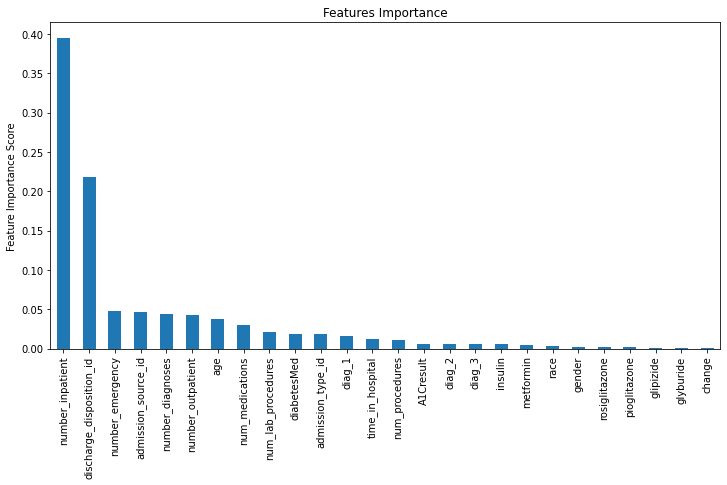

In [29]:
allfeat=[b for b in Btrain.columns]
print(allfeat)
bestfeat=pd.Series(gbst.feature_importances_,allfeat).sort_values(ascending=False)
figure=plt.figure(figsize=(12,6))
bestfeat.plot(kind='bar',title='Features Importance')
plt.ylabel('Feature Importance Score')


We can notice that the time spent in hospital is not an important feature in the model. This surprised us and we did further research on this variable to understand. We can see that no matter if the patient will be readmitted or not, the distribution of the time spent in the hospital is the same. 

Text(0.5, 1.0, 'Time in Hospital VS Readmittion')

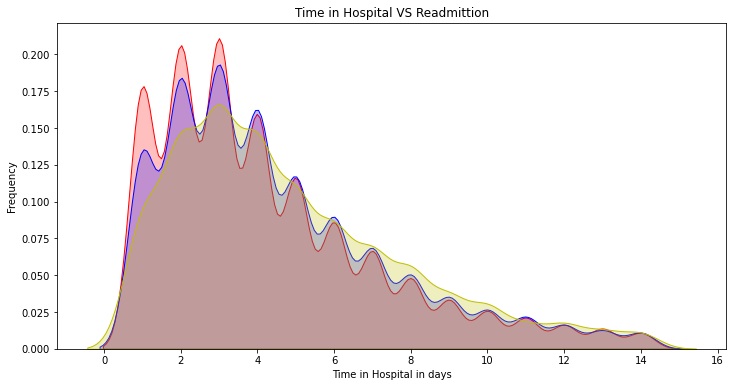

In [30]:
fig=plt.figure(figsize=(12,6))
ax=sns.kdeplot(df.loc[(df['readmitted']==3),'time_in_hospital'],color='r',shade=True,label='No readmittion')
ax=sns.kdeplot(df.loc[(df['readmitted']==2),'time_in_hospital'],color='b',shade=True,label='Readmittion in >30 days')
ax=sns.kdeplot(df.loc[(df['readmitted']==1),'time_in_hospital'],color='y',shade=True,label='Readmitted in <30 days')
ax.set(xlabel='Time in Hospital in days',ylabel='Frequency')
plt.title('Time in Hospital VS Readmittion')

Here we drop features that we decided to exclude and we scale and implement the Gradient Boosting on the new data. 

In [31]:
B=B.drop(['race', 'gender',  'admission_type_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures','diag_1', 'diag_2', 'diag_3', 'A1Cresult', 'metformin', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed'],axis=1)
Btrain,Btry,Atrain,Atry = train_test_split(B,A,test_size=0.3,random_state=101)
Bval,Btest,Aval,Atest = train_test_split(Btry,Atry,test_size=0.5,random_state=101)
Btrain_scale=scaler.fit_transform(Btrain)
Bval_scale=scaler.fit_transform(Bval)
Btest_scale=scaler.fit_transform(Btest)

gbst=GradientBoostingClassifier()
gbst.fit(Btrain,Atrain)
gbst_pred=gbst.predict(Bval)

print(metrics.f1_score(Aval,gbst_pred,average='micro'))
print(confusion_matrix(Aval,gbst_pred))
pickle.dump(gbst, open('GB_prediction.pkl', 'wb'))


0.578525284027623
[[  32  619  849]
 [  23 1703 3062]
 [  11 1112 6056]]


We check that the 'metrics.f1_score' is correct.


In [32]:

np.set_printoptions(threshold=sys.maxsize)
print(Aval)
#print(Bval)
#(gbst_pred)
aaa=np.array([[8, 22, 7, 25, 0,0,1,9],[8, 18, 7, 13, 0,0,3,8],[7, 1, 7, 15, 0,0,1,9],[7, 1, 20, 11, 0,0,0,6]])
print(aaa)
bbb=2133

gbst_pred2=gbst.predict(aaa)


85805     2
14690     1
101188    3
3160      3
9850      3
         ..
38318     2
84189     3
57186     2
78574     3
99713     1
Name: readmitted, Length: 13467, dtype: int64
[[ 8 22  7 25  0  0  1  9]
 [ 8 18  7 13  0  0  3  8]
 [ 7  1  7 15  0  0  1  9]
 [ 7  1 20 11  0  0  0  6]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


85805     2
14690     1
101188    3
3160      3
9850      3
         ..
38318     2
84189     3
57186     2
78574     3
99713     1
Name: readmitted, Length: 13467, dtype: int64
        age  discharge_disposition_id  admission_source_id  num_medications  \
85805     8                        22                    7               25   
14690     8                        18                    7               13   
101188    7                         1                    7               15   
3160      7                         1                   20               11   
9850      9                         1                   17               13   
...     ...                       ...                  ...              ...   
38318     8                         1                    1               16   
84189     8                         1                    7               12   
57186     8                         1                    7               16   
78574     9                     